In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/DataHackathon.csv', sep=';', encoding='utf-8')

In [ ]:
def corregir_cantidad(valor):
    valor_str = str(valor)
    if valor_str.endswith("0000"):
        return int(valor_str.rstrip("0"))
    elif valor_str.endswith("000"):
        return int(valor_str.rstrip("0"))
    else:
        return valor

# Aplicar la función
df["Cantidad Corregida"] = df["Cantidad"].apply(corregir_cantidad)


In [ ]:
df.head()

,Orden de Venta,Creacion Orden de Venta,Codigo Cliente,Articulo,Cantidad,Unidad de venta,Cantidad Corregida
0,ABC063830,04/01/2021,D0F11A42,IVP11576,60,L,60
1,ABC063832,04/01/2021,51BDF46D,IVP07229,540,KG,540
2,ABC063833,04/01/2021,803745AA,IVP04039,3,PZA,3
3,ABC063834,04/01/2021,803745AA,IVP04039,4,PZA,4
4,ABC063835,04/01/2021,803745AA,IVP01010,1,PZA,1


In [ ]:
df.drop(columns='Cantidad', inplace=True)

In [ ]:
df.head()

,Orden de Venta,Creacion Orden de Venta,Codigo Cliente,Articulo,Unidad de venta,Cantidad Corregida
0,ABC063830,04/01/2021,D0F11A42,IVP11576,L,60
1,ABC063832,04/01/2021,51BDF46D,IVP07229,KG,540
2,ABC063833,04/01/2021,803745AA,IVP04039,PZA,3
3,ABC063834,04/01/2021,803745AA,IVP04039,PZA,4
4,ABC063835,04/01/2021,803745AA,IVP01010,PZA,1


In [ ]:
df.rename(columns={"Cantidad Corregida": "Cantidad"}, inplace=True)

In [ ]:
df['Cantidad'].sort_values(ascending=False)

,Cantidad
15141,37800
15138,37800
15154,37800
15136,37800
6534,30240
...,...
1658,0
12773,0
12792,0
12771,0


In [ ]:
df.head()

,Orden de Venta,Creacion Orden de Venta,Codigo Cliente,Articulo,Unidad de venta,Cantidad
0,ABC063830,04/01/2021,D0F11A42,IVP11576,L,60
1,ABC063832,04/01/2021,51BDF46D,IVP07229,KG,540
2,ABC063833,04/01/2021,803745AA,IVP04039,PZA,3
3,ABC063834,04/01/2021,803745AA,IVP04039,PZA,4
4,ABC063835,04/01/2021,803745AA,IVP01010,PZA,1


#Análisis general de los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31156 entries, 0 to 31155
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Orden de Venta           31156 non-null  object
 1   Creacion Orden de Venta  31156 non-null  object
 2   Codigo Cliente           31156 non-null  object
 3   Articulo                 31156 non-null  object
 4   Unidad de venta          31156 non-null  object
 5   Cantidad                 31156 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [ ]:
df.shape

(31156, 6)

In [ ]:
#Revisar si hay valores nulos
df.isnull().sum()

,0
Orden de Venta,0
Creacion Orden de Venta,0
Codigo Cliente,0
Articulo,0
Unidad de venta,0
Cantidad,0


In [ ]:
#Revisar duplicados
df.duplicated().sum()

np.int64(4957)

In [ ]:
df_cleaned= df.drop_duplicates()

In [ ]:
df_cleaned.duplicated().sum() #Revisar si ya es 0

np.int64(0)

In [ ]:
#Pasamos a datetime la Creacion Orden de Venta

df_cleaned.loc[:, "Creacion Orden de Venta"] = pd.to_datetime(df_cleaned["Creacion Orden de Venta"], format="%d/%m/%Y", errors="coerce")


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26199 entries, 0 to 31155
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Orden de Venta           26199 non-null  object
 1   Creacion Orden de Venta  26199 non-null  object
 2   Codigo Cliente           26199 non-null  object
 3   Articulo                 26199 non-null  object
 4   Unidad de venta          26199 non-null  object
 5   Cantidad                 26199 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [ ]:
df_cleaned.head()

,Orden de Venta,Creacion Orden de Venta,Codigo Cliente,Articulo,Unidad de venta,Cantidad
0,ABC063830,2021-01-04 00:00:00,D0F11A42,IVP11576,L,60
1,ABC063832,2021-01-04 00:00:00,51BDF46D,IVP07229,KG,540
2,ABC063833,2021-01-04 00:00:00,803745AA,IVP04039,PZA,3
3,ABC063834,2021-01-04 00:00:00,803745AA,IVP04039,PZA,4
4,ABC063835,2021-01-04 00:00:00,803745AA,IVP01010,PZA,1


In [ ]:
df_cleaned['Cantidad'].value_counts().get(0)

np.int64(20)

In [ ]:
df_errores= df_cleaned[df_cleaned['Cantidad']==0]
df_errores.head()

,Orden de Venta,Creacion Orden de Venta,Codigo Cliente,Articulo,Unidad de venta,Cantidad
1021,ABC064502,2021-02-02 00:00:00,38245D20,IVP11356,L,0
1658,ABC064953,2021-02-23 00:00:00,9D26F1C7,IVP07489,KG,0
1751,ABC065030,2021-02-25 00:00:00,803745AA,IVP01012,L,0
2039,ABC065207,2021-03-06 00:00:00,8AF42C0A,IVP14025,KG,0
2041,ABC065207,2021-03-06 00:00:00,8AF42C0A,IVP14019,KG,0


In [ ]:
df_cleaned= df_cleaned[df_cleaned['Cantidad']>0]

In [ ]:
#hacemos df por unidades
df_kg = df_cleaned[df_cleaned["Unidad de venta"] == "KG"]
df_l = df_cleaned[df_cleaned["Unidad de venta"] == "L"]
df_pza = df_cleaned[df_cleaned["Unidad de venta"] == "PZA"]

##Kg

In [ ]:
df_kg.head()

,Orden de Venta,Creacion Orden de Venta,Codigo Cliente,Articulo,Unidad de venta,Cantidad
1,ABC063832,2021-01-04 00:00:00,51BDF46D,IVP07229,KG,540
12,ABC063841,2021-01-04 00:00:00,65443B91,IVP08003,KG,150
14,ABC063841,2021-01-04 00:00:00,65443B91,IVP07144,KG,540
16,ABC063842,2021-01-04 00:00:00,CD9DC2BB,IVP07131,KG,27
17,ABC063843,2021-01-04 00:00:00,C65FD229,IVP08003,KG,4


In [ ]:
df_kg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12826 entries, 1 to 31152
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Orden de Venta           12826 non-null  object
 1   Creacion Orden de Venta  12826 non-null  object
 2   Codigo Cliente           12826 non-null  object
 3   Articulo                 12826 non-null  object
 4   Unidad de venta          12826 non-null  object
 5   Cantidad                 12826 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [ ]:
df_kg.shape

(12826, 6)

In [ ]:
df_kg['Cantidad'].describe()

,Cantidad
count,12826.000000
mean,596.397942
std,1514.959710
min,1.000000
25%,30.000000
50%,135.000000
75%,540.000000
max,37800.000000


In [ ]:
df_kg['Cantidad'].value_counts()

,count
Cantidad,
27,1537
270,1388
54,1008
540,786
81,500
...,...
8910,1
1020,1
226,1


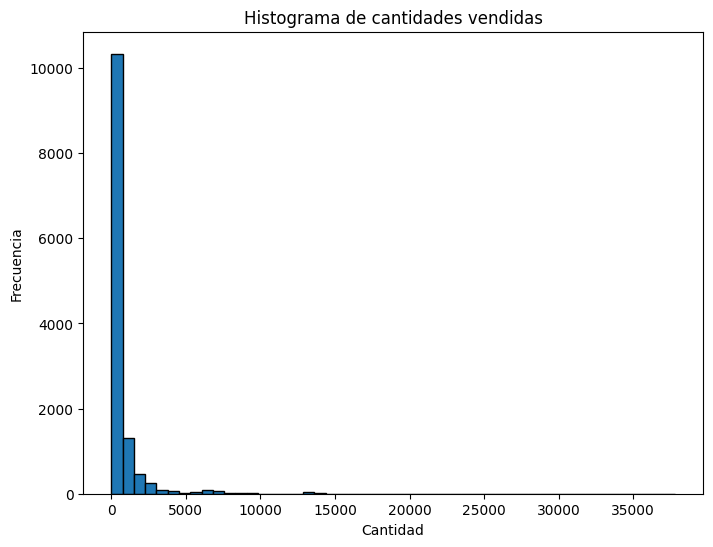

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df_kg['Cantidad'], bins=50, edgecolor='black')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.title('Histograma de cantidades vendidas')
plt.show() #Podemos ver que hay valores extremos que no nos dejan visualizar bien la disitribucion

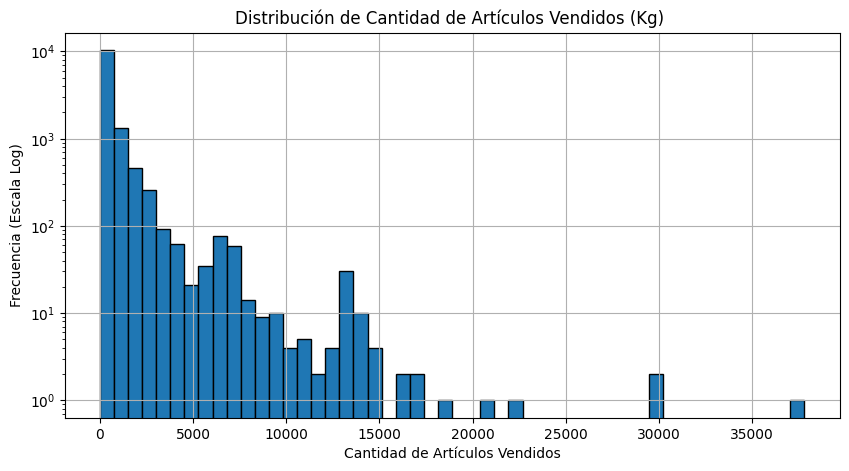

In [ ]:
#Transformación log
plt.figure(figsize=(10, 5))
plt.hist(df_kg['Cantidad'], bins=50, edgecolor='black', log=True)
plt.title("Distribución de Cantidad de Artículos Vendidos (Kg) ")
plt.xlabel("Cantidad de Artículos Vendidos")
plt.ylabel("Frecuencia (Escala Log)")
plt.grid(True)
plt.show()

##Litros

In [ ]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7702 entries, 0 to 31155
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Orden de Venta           7702 non-null   object
 1   Creacion Orden de Venta  7702 non-null   object
 2   Codigo Cliente           7702 non-null   object
 3   Articulo                 7702 non-null   object
 4   Unidad de venta          7702 non-null   object
 5   Cantidad                 7702 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 421.2+ KB


In [ ]:
df_l.shape

(7702, 6)

In [ ]:
df_l['Cantidad'].describe()

,Cantidad
count,7702.000000
mean,366.098935
std,746.077695
min,1.000000
25%,28.000000
50%,142.000000
75%,312.000000
max,17280.000000


In [ ]:
df_l['Cantidad'].value_counts()

,count
Cantidad,
28,1185
300,1174
57,722
600,585
85,477
...,...
2082,1
1098,1
528,1


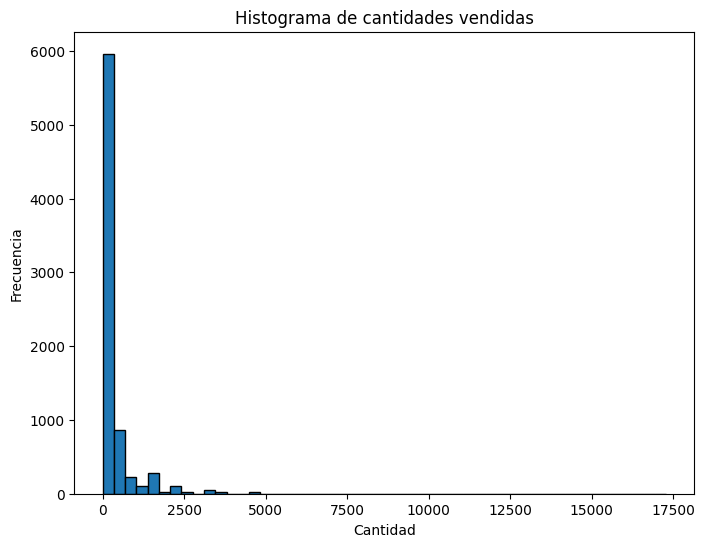

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df_l['Cantidad'], bins=50, edgecolor='black')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.title('Histograma de cantidades vendidas')
plt.show() #Podemos ver que hay valores extremos que no nos dejan visualizar bien la disitribucion

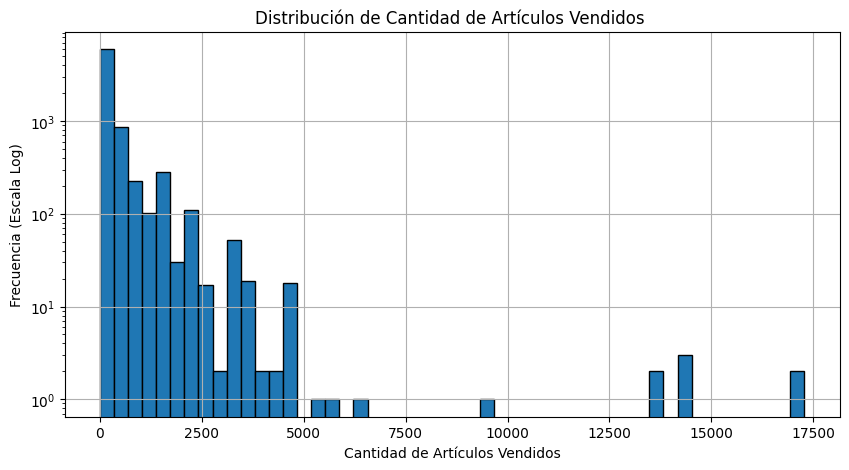

In [ ]:
#Transformación log
plt.figure(figsize=(10, 5))
plt.hist(df_l['Cantidad'], bins=50, edgecolor='black', log=True)
plt.title("Distribución de Cantidad de Artículos Vendidos ")
plt.xlabel("Cantidad de Artículos Vendidos")
plt.ylabel("Frecuencia (Escala Log)")
plt.grid(True)
plt.show()

##Piezas

In [ ]:
df_pza.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5651 entries, 2 to 31154
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Orden de Venta           5651 non-null   object
 1   Creacion Orden de Venta  5651 non-null   object
 2   Codigo Cliente           5651 non-null   object
 3   Articulo                 5651 non-null   object
 4   Unidad de venta          5651 non-null   object
 5   Cantidad                 5651 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 309.0+ KB


In [ ]:
df_pza.shape

(5651, 6)

In [ ]:
df_pza['Cantidad'].describe()

,Cantidad
count,5651.000000
mean,25.878252
std,77.154962
min,1.000000
25%,1.000000
50%,9.000000
75%,27.000000
max,4500.000000


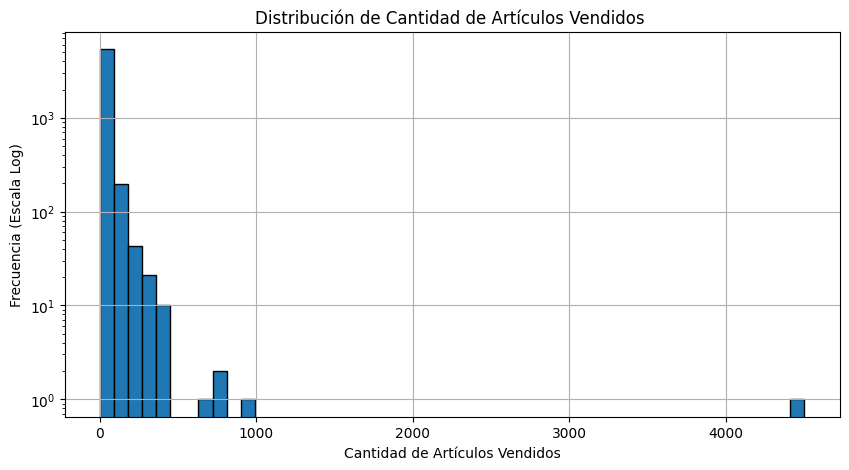

In [ ]:
#Transformación log
plt.figure(figsize=(10, 5))
plt.hist(df_pza['Cantidad'], bins=50, edgecolor='black', log=True)
plt.title("Distribución de Cantidad de Artículos Vendidos ")
plt.xlabel("Cantidad de Artículos Vendidos")
plt.ylabel("Frecuencia (Escala Log)")
plt.grid(True)
plt.show()

#Análisis de Clientes

In [ ]:
# Contar la cantidad de clientes únicos
num_clientes_unicos = df_cleaned["Codigo Cliente"].nunique()
print("Cantidad de clientes únicos:", num_clientes_unicos)

Cantidad de clientes únicos: 907


In [ ]:
# Calcular la cantidad de pedidos por cliente
pedidos_por_cliente = df["Codigo Cliente"].value_counts()
pedidos_por_cliente.head()

,count
Codigo Cliente,
803745AA,2064
4F9C8AE7,1399
09366E94,1141
2F7E811E,825
44A6310B,821


In [ ]:
#Estadísticas de pedidos por cliente
pedidos_por_cliente.describe()

,count
count,907.000000
mean,34.350606
std,120.793771
min,1.000000
25%,2.000000
50%,5.000000
75%,21.500000
max,2064.000000


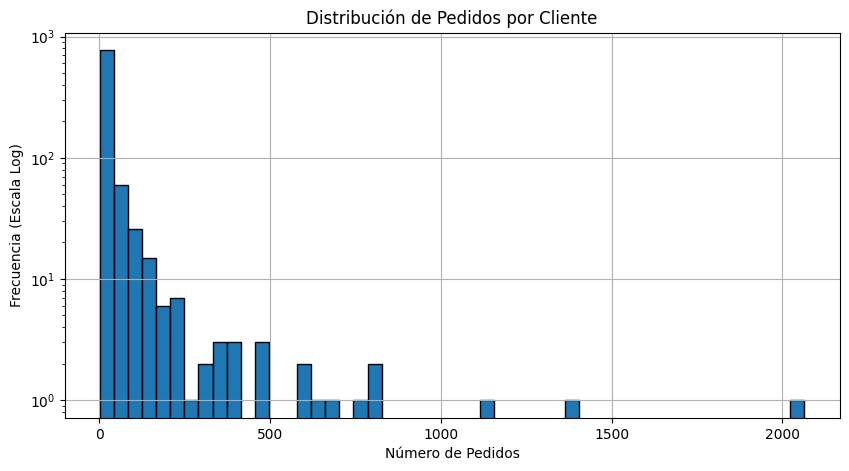

In [ ]:
#Distribución de pedidos por cliente
plt.figure(figsize=(10, 5))
plt.hist(pedidos_por_cliente, bins=50, edgecolor='black', log=True)
plt.title("Distribución de Pedidos por Cliente")
plt.xlabel("Número de Pedidos")
plt.ylabel("Frecuencia (Escala Log)")
plt.grid(True)
plt.show()

In [ ]:
# Obtener los 10 clientes con más pedidos
top_clientes_pedidos = pedidos_por_cliente.head(10)

Text(0.5, 1.0, 'Top 10 Clientes con Más Pedidos')

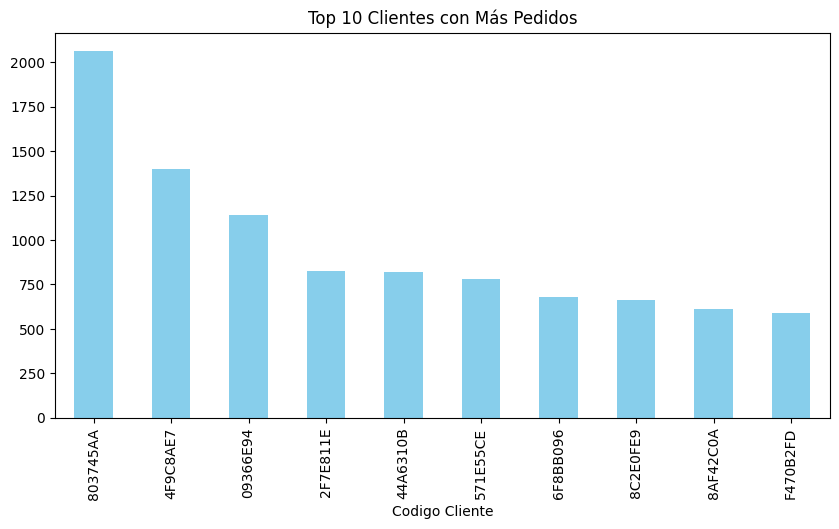

In [ ]:
plt.figure(figsize=(10, 5))
top_clientes_pedidos.plot(kind='bar', color='skyblue')
plt.title("Top 10 Clientes con Más Pedidos")

In [ ]:

def articulos_por_cliente(data):
    articulos_por_cliente = data.groupby("Codigo Cliente")["Cantidad"].sum().sort_values(ascending=False)
    return articulos_por_cliente

def agrupar_clientes_pedidos_art(data):
    df_agrupado = df.groupby("Codigo Cliente").agg(
    Cantidad_Total=("Cantidad", "sum"),  # Suma total de artículos comprados
    Numero_Pedidos=("Orden de Venta", "count")  # Número de pedidos realizados
    ).sort_values(by="Cantidad_Total", ascending=False)
    return df_agrupado

def graficar_articulos_por_cliente(articulos_por_cliente):
    plt.figure(figsize=(10, 5))
    plt.hist(articulos_por_cliente, bins=50, edgecolor='black', log=True)
    plt.title("Distribución de Artículos Comprados por Cliente")
    plt.xlabel("Cantidad de Artículos Comprados")
    plt.ylabel("Frecuencia (Escala Log)")
    plt.grid(True)
    plt.show()



In [ ]:
articulos_por_cliente_kg=articulos_por_cliente(df_kg)
articulos_por_cliente_l=articulos_por_cliente(df_l)
articulos_por_cliente_pza=articulos_por_cliente(df_pza)

In [ ]:
df_agrupado_kg=agrupar_clientes_pedidos_art(df_kg)
df_agrupado_l=agrupar_clientes_pedidos_art(df_l)
df_agrupado_pza=agrupar_clientes_pedidos_art(df_pza)

##kg

In [ ]:
articulos_por_cliente_kg.head()

,Cantidad
Codigo Cliente,
4F9C8AE7,1190944
F470B2FD,905489
09366E94,697311
FA983DB5,453654
6F8BB096,389403


In [ ]:
articulos_por_cliente_kg.describe()

,Cantidad
count,5.230000e+02
mean,1.462600e+04
std,7.996531e+04
min,1.000000e+00
25%,5.700000e+01
50%,3.780000e+02
75%,2.415000e+03
max,1.190944e+06


In [ ]:
df_agrupado_kg.head()

,Cantidad_Total,Numero_Pedidos
Codigo Cliente,,
4F9C8AE7,1761756,1399
F470B2FD,1219808,590
09366E94,1150361,1141
FA983DB5,798606,171
055AC9D6,648365,187


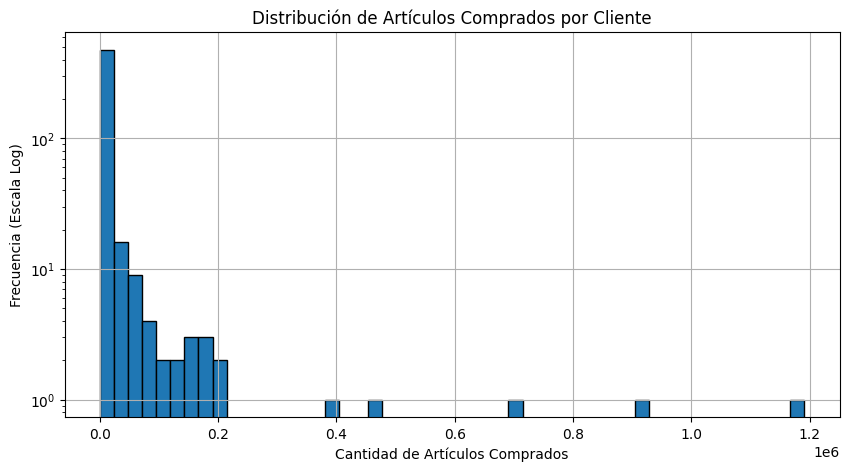

In [ ]:
graficar_articulos_por_cliente(articulos_por_cliente_kg)

Text(0.5, 1.0, 'Top 10 Clientes con Más Artículos Comprados')

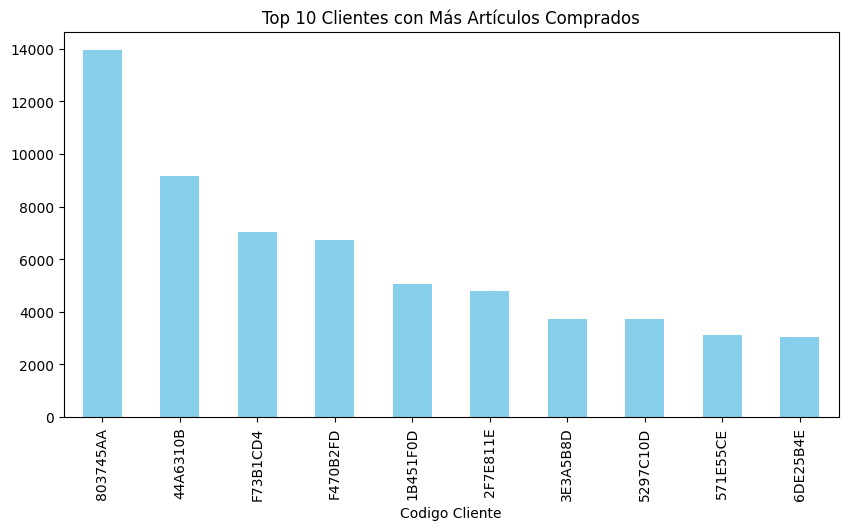

In [ ]:
# Obtener los 10 clientes que más artículos han comprado
top_clientes_articulos_kg = articulos_por_cliente_pza.head(10)

plt.figure(figsize=(10, 5))
top_clientes_articulos_kg.plot(kind='bar', color='skyblue')
plt.title("Top 10 Clientes con Más Artículos Comprados")

##Litros

In [ ]:
articulos_por_cliente_l.head()

,Cantidad
Codigo Cliente,
4F9C8AE7,464893
09366E94,214738
F934838F,148843
FA983DB5,95112
2E3435F1,73020


In [ ]:
articulos_por_cliente_l.describe()

,Cantidad
count,415.000000
mean,6794.443373
std,28214.257331
min,1.000000
25%,56.500000
50%,405.000000
75%,3929.000000
max,464893.000000


In [ ]:
df_agrupado_l.head()

,Cantidad_Total,Numero_Pedidos
Codigo Cliente,,
4F9C8AE7,1761756,1399
F470B2FD,1219808,590
09366E94,1150361,1141
FA983DB5,798606,171
055AC9D6,648365,187


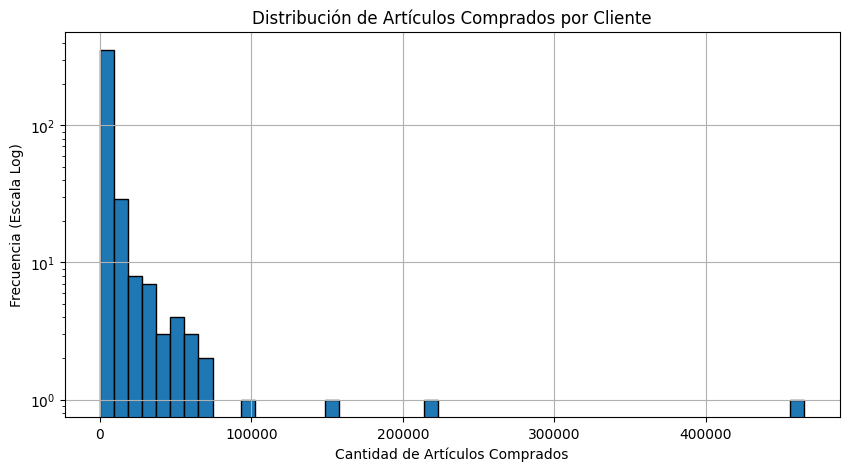

In [ ]:
graficar_articulos_por_cliente(articulos_por_cliente_l)

Text(0.5, 1.0, 'Top 10 Clientes con Más Artículos Comprados')

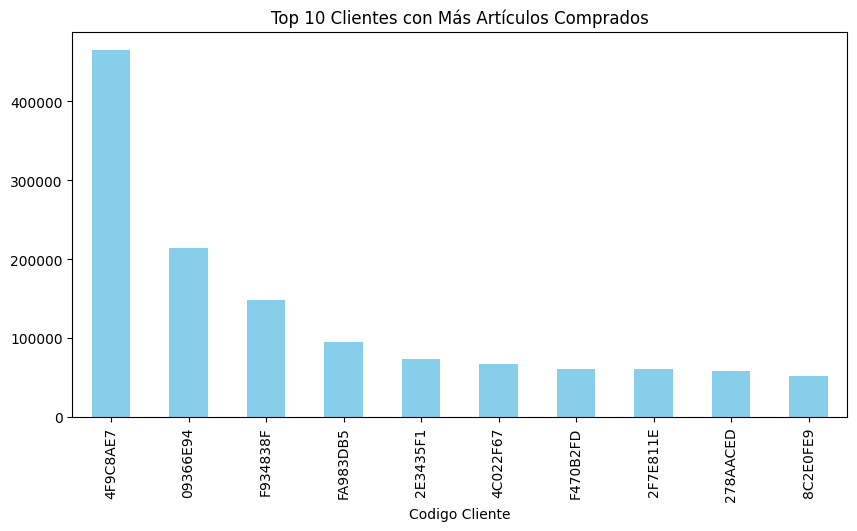

In [ ]:
# Obtener los 10 clientes que más artículos han comprado
top_clientes_articulos_l = articulos_por_cliente_l.head(10)

plt.figure(figsize=(10, 5))
top_clientes_articulos_l.plot(kind='bar', color='skyblue')
plt.title("Top 10 Clientes con Más Artículos Comprados")

##Piezas

In [ ]:
articulos_por_cliente_pza.head()

,Cantidad
Codigo Cliente,
803745AA,13946
44A6310B,9177
F73B1CD4,7020
F470B2FD,6714
1B451F0D,5049


In [ ]:
articulos_por_cliente_pza.describe()

,Cantidad
count,395.000000
mean,370.222785
std,1152.949357
min,1.000000
25%,10.000000
50%,36.000000
75%,184.000000
max,13946.000000


In [ ]:
df_agrupado_pza.head()

,Cantidad_Total,Numero_Pedidos
Codigo Cliente,,
4F9C8AE7,1761756,1399
F470B2FD,1219808,590
09366E94,1150361,1141
FA983DB5,798606,171
055AC9D6,648365,187


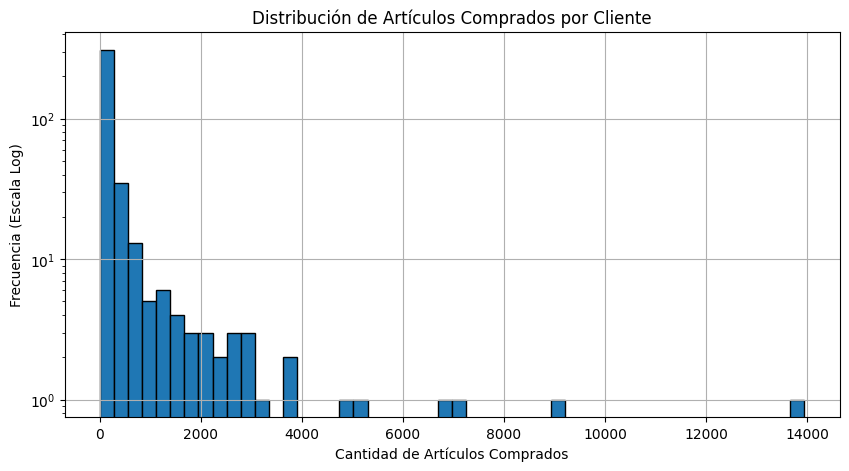

In [ ]:
graficar_articulos_por_cliente(articulos_por_cliente_pza)

Text(0.5, 1.0, 'Top 10 Clientes con Más Artículos Comprados')

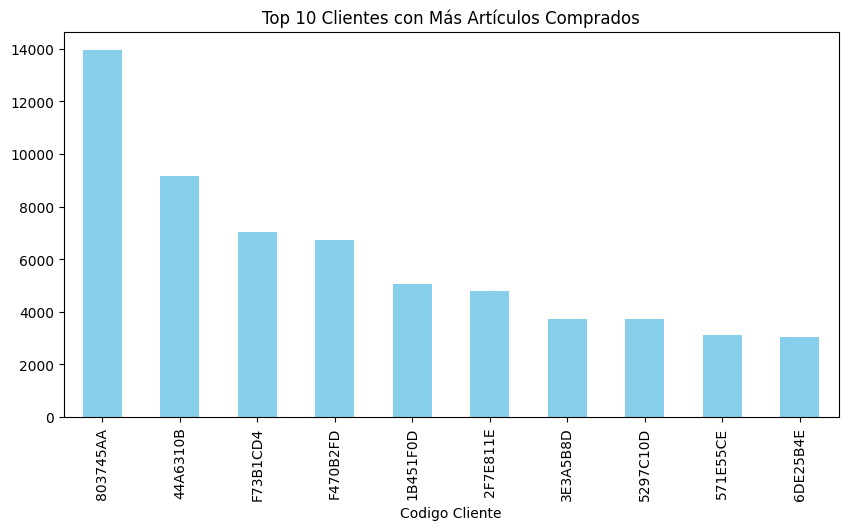

In [ ]:
# Obtener los 10 clientes que más artículos han comprado
top_clientes_articulos_pza = articulos_por_cliente_pza.head(10)

plt.figure(figsize=(10, 5))
top_clientes_articulos_pza.plot(kind='bar', color='skyblue')
plt.title("Top 10 Clientes con Más Artículos Comprados")

#Análisis de artículos

In [ ]:
df_cleaned['Articulo'].nunique()
print("Cantidad de artículos únicos:", df['Articulo'].nunique())

Cantidad de artículos únicos: 889


In [ ]:
# Calcular la cantidad total de artículos vendidos por tipo de artículo
def articulos_ventas_totales(data):
    articulos_ventas_totales = data.groupby("Articulo")["Cantidad"].sum().sort_values(ascending=False)
    return articulos_ventas_totales



# Crear gráfico de distribución de artículos vendidos
def graficar_articulos_ventas_totales(articulos_ventas_totales):
    plt.figure(figsize=(8, 5))
    plt.hist(articulos_ventas_totales, bins=50, edgecolor='black', log=True)
    plt.title("Distribución de Cantidad de Artículos Vendidos")
    plt.xlabel("Cantidad de Artículos Vendidos")
    plt.ylabel("Frecuencia (log)")
    plt.show()

In [ ]:
articulos_ventas_totales_kg=articulos_ventas_totales(df_kg)
articulos_ventas_totales_l=articulos_ventas_totales(df_l)
articulos_ventas_totales_pza=articulos_ventas_totales(df_pza)

In [ ]:
articulos_ventas_totales_kg.describe(), articulos_ventas_totales_l.describe(), articulos_ventas_totales_pza.describe()

(count       448.000000
 mean      17074.553571
 std       63787.068691
 min           1.000000
 25%          66.000000
 50%        1080.000000
 75%        7843.500000
 max      897102.000000
 Name: Cantidad, dtype: float64,
 count       327.000000
 mean       8622.917431
 std       21077.378543
 min           1.000000
 25%         203.500000
 50%        1670.000000
 75%        8102.000000
 max      207724.000000
 Name: Cantidad, dtype: float64,
 count      181.000000
 mean       807.944751
 std       3491.321986
 min          1.000000
 25%          2.000000
 50%         18.000000
 75%        168.000000
 max      33548.000000
 Name: Cantidad, dtype: float64)

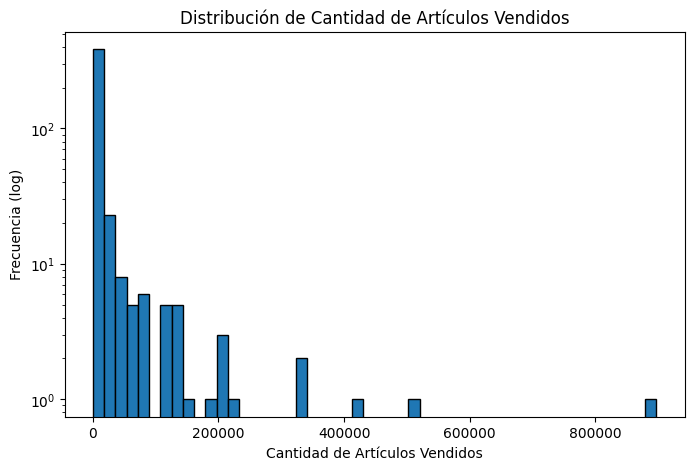

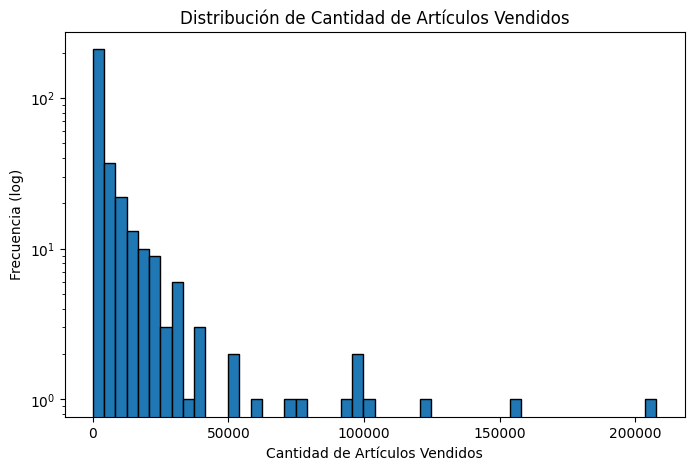

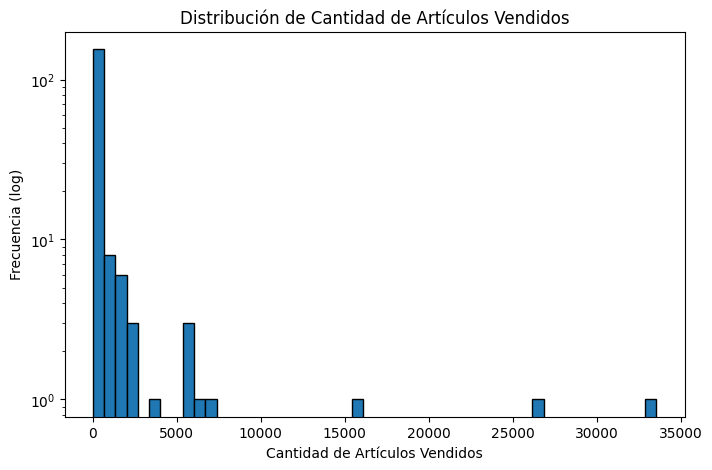

In [ ]:
graficar_articulos_ventas_totales(articulos_ventas_totales_kg)
graficar_articulos_ventas_totales(articulos_ventas_totales_l)
graficar_articulos_ventas_totales(articulos_ventas_totales_pza)

In [ ]:
# Articulo ordenados por su numero de pedidos
articulos_pedidos_totales = df_cleaned.groupby("Articulo")["Orden de Venta"].count().sort_values(ascending=False)
articulos_pedidos_totales.head(15)

,Orden de Venta
Articulo,
IVP04039,2030
IVP07165,570
IVP04009,454
IVP11694,431
IVP11159,401
IVP11162,373
IVP07331,363
IVP07169,346
IVP11479,286


In [ ]:
#top 10 artículos más vendidos
top_articulos_vendidos_kg = articulos_ventas_totales_kg.head(10)
top_articulos_vendidos_l = articulos_ventas_totales_l.head(10)
top_articulos_vendidos_pza = articulos_ventas_totales_pza.head(10)

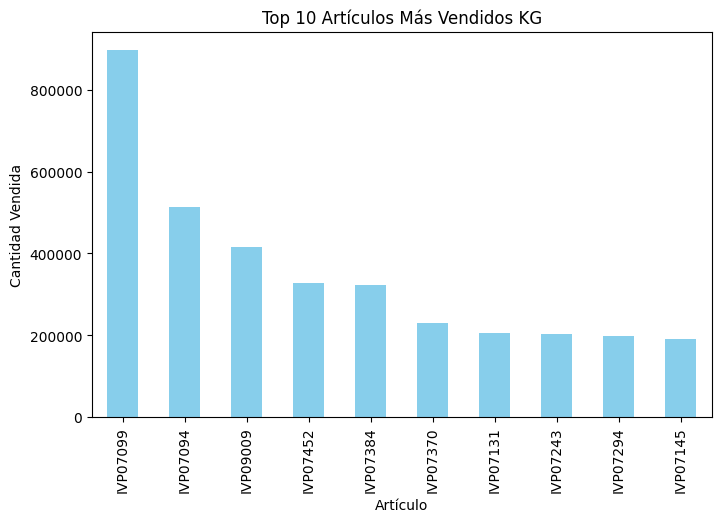

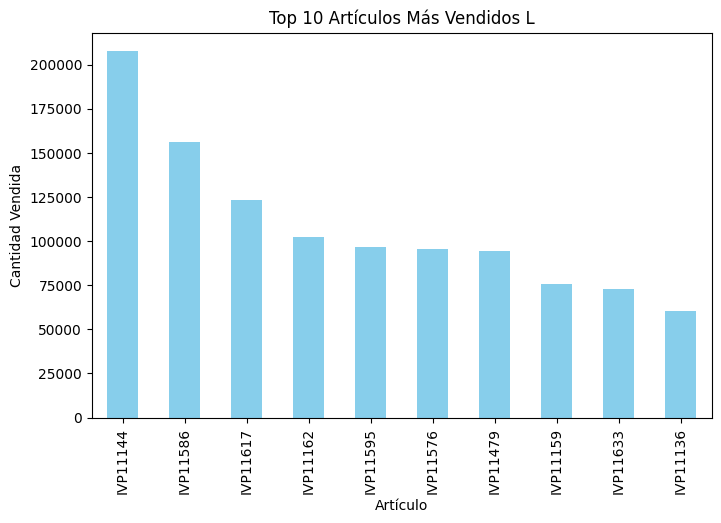

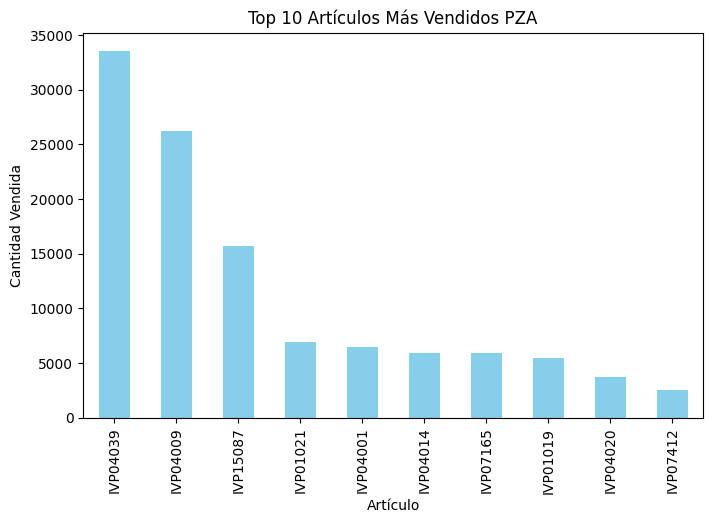

In [ ]:
plt.figure(figsize=(8, 5))
top_articulos_vendidos_kg.plot(kind='bar', color='skyblue')
plt.title("Top 10 Artículos Más Vendidos KG")
plt.xlabel("Artículo")
plt.ylabel("Cantidad Vendida")
plt.show()

plt.figure(figsize=(8, 5))
top_articulos_vendidos_l.plot(kind='bar', color='skyblue')
plt.title("Top 10 Artículos Más Vendidos L")
plt.xlabel("Artículo")
plt.ylabel("Cantidad Vendida")
plt.show()

plt.figure(figsize=(8, 5))
top_articulos_vendidos_pza.plot(kind='bar', color='skyblue')
plt.title("Top 10 Artículos Más Vendidos PZA")
plt.xlabel("Artículo")
plt.ylabel("Cantidad Vendida")
plt.show()

Text(0, 0.5, 'Número de Pedidos')

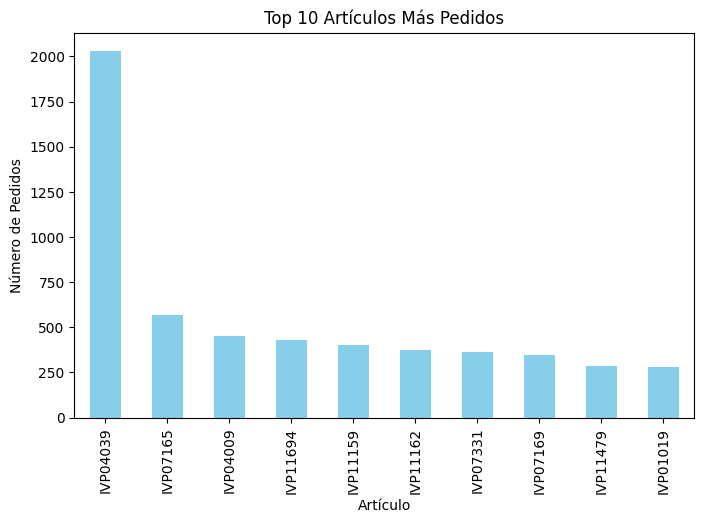

In [ ]:
#top 10 artículos más pedidos
top_articulos_pedidos = articulos_pedidos_totales.head(10)

plt.figure(figsize=(8, 5))
top_articulos_pedidos.plot(kind='bar', color='skyblue')
plt.title("Top 10 Artículos Más Pedidos")
plt.xlabel("Artículo")
plt.ylabel("Número de Pedidos")

#Análisis temporal

In [ ]:
def graficar_tendencias_temporales(data):
    # Agrupar las ventas por fecha para analizar tendencias temporales
    ventas_por_fecha = data.groupby("Creacion Orden de Venta")["Cantidad"].sum()

    # Graficar la evolución de las ventas en el tiempo
    plt.figure(figsize=(10, 5))
    plt.plot(ventas_por_fecha.index, ventas_por_fecha.values, marker='o', linestyle='-')
    plt.title("Tendencia de Ventas a lo Largo del Tiempo")
    plt.xlabel("Fecha")
    plt.ylabel("Cantidad Total Vendida")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

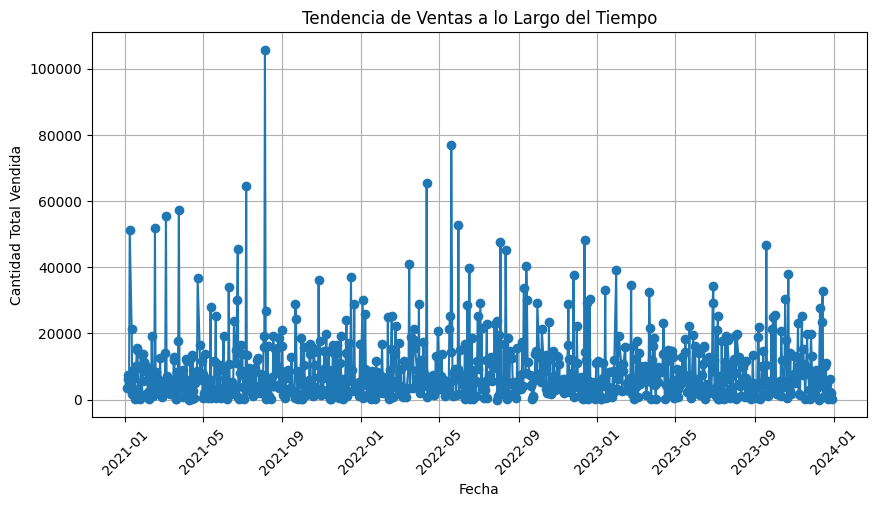

In [ ]:
graficar_tendencias_temporales(df_kg)

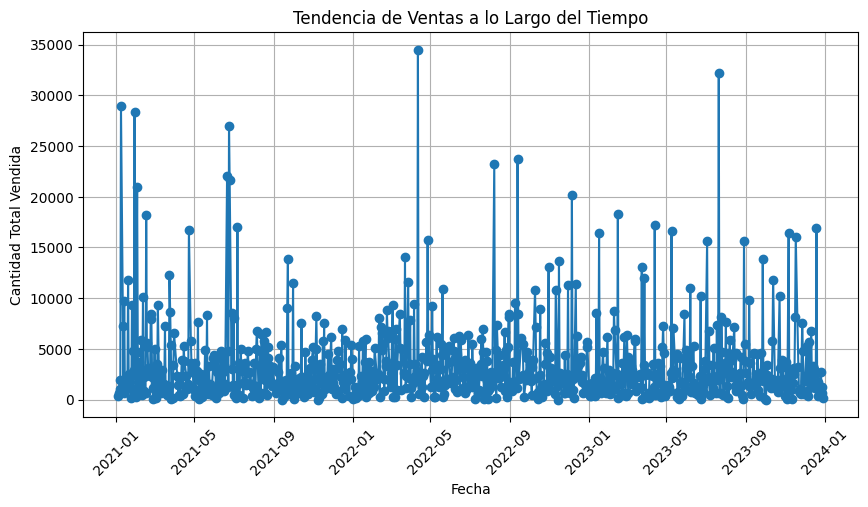

In [ ]:
graficar_tendencias_temporales(df_l)

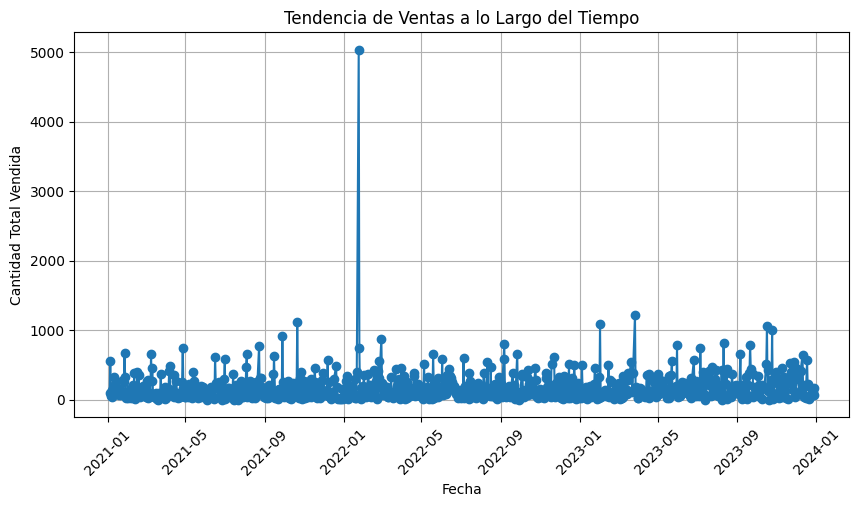

In [ ]:
graficar_tendencias_temporales(df_pza)

In [ ]:
df_kg.head()

,Orden de Venta,Creacion Orden de Venta,Codigo Cliente,Articulo,Unidad de venta,Cantidad
1,ABC063832,2021-01-04 00:00:00,51BDF46D,IVP07229,KG,540
12,ABC063841,2021-01-04 00:00:00,65443B91,IVP08003,KG,150
14,ABC063841,2021-01-04 00:00:00,65443B91,IVP07144,KG,540
16,ABC063842,2021-01-04 00:00:00,CD9DC2BB,IVP07131,KG,27
17,ABC063843,2021-01-04 00:00:00,C65FD229,IVP08003,KG,4


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26179 entries, 0 to 31155
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Orden de Venta           26179 non-null  object
 1   Creacion Orden de Venta  26179 non-null  object
 2   Codigo Cliente           26179 non-null  object
 3   Articulo                 26179 non-null  object
 4   Unidad de venta          26179 non-null  object
 5   Cantidad                 26179 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


#Análisis de errores

In [ ]:
# Analizar si estos clientes tienen pedidos con cantidad mayor a 0
clientes_cantidad_cero = df_errores["Codigo Cliente"].unique()
pedidos_clientes_validos = df_cleaned[(df_cleaned["Codigo Cliente"].isin(clientes_cantidad_cero)) & (df_cleaned["Cantidad"] > 0)]

# Analizar si estos artículos han sido vendidos en otras ocasiones
articulos_cantidad_cero = df_errores["Articulo"].unique()
ventas_articulos_validos = df_cleaned[(df_cleaned["Articulo"].isin(articulos_cantidad_cero)) & (df_cleaned["Cantidad"] > 0)]



* Clientes: Todos los clientes que tienen pedidos con cantidad 0 también han realizado pedidos válidos (con cantidad mayor a 0). Esto sugiere que esos registros no corresponden a clientes inactivos o inválidos.

* Artículos: Todos los artículos que aparecen con cantidad 0 también han sido vendidos en otras ocasiones con cantidad mayor a 0. Esto indica que esos productos no son necesariamente obsoletos o erróneos

#Predicción de inventario

#CORRECCION XGBOOST

In [ ]:
# Función para eliminar outliers usando el rango intercuartílico (IQR)
def eliminar_outliers_iqr(df, columna="Cantidad"):
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr
    return df[(df[columna] >= lim_inf) & (df[columna] <= lim_sup)]

# Aplicar limpieza de outliers a cada subconjunto
df_kg_sin_outliers = eliminar_outliers_iqr(df_kg)
df_l_sin_outliers = eliminar_outliers_iqr(df_l)
df_pza_sin_outliers = eliminar_outliers_iqr(df_pza)



In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import numpy as np
import pandas as pd

def validar_cruzado(df, nombre_unidad):
    """
    Aplica validación cruzada con XGBoost para una unidad de venta.
    Usa RMSE como métrica y 5 folds.
    """

    # Crear features
    df = df.copy()
    df["Año"] = pd.to_datetime(df["Creacion Orden de Venta"]).dt.year
    df["Mes"] = pd.to_datetime(df["Creacion Orden de Venta"]).dt.month
    df["Dia"] = pd.to_datetime(df["Creacion Orden de Venta"]).dt.day
    df["DiaSemana"] = pd.to_datetime(df["Creacion Orden de Venta"]).dt.dayofweek

    # Codificar variables categóricas
    le_art = LabelEncoder()
    le_cli = LabelEncoder()
    df["Articulo_cod"] = le_art.fit_transform(df["Articulo"])
    df["Cliente_cod"] = le_cli.fit_transform(df["Codigo Cliente"])

    # Variables predictoras
    X = df[["Año", "Mes", "Dia", "DiaSemana", "Articulo_cod", "Cliente_cod"]]
    y = np.log1p(df["Cantidad"])  # Transformación logarítmica

    # Modelo con regularización ligera
    modelo = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.5,
        reg_lambda=1.0,
        random_state=42
    )

    # RMSE
    def rmse_score(y_true, y_pred):
        return np.sqrt(np.mean((y_true - y_pred) ** 2))

    scorer = make_scorer(rmse_score, greater_is_better=False)

    # Validación cruzada con 5 folds
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(modelo, X, y, scoring=scorer, cv=kf)

    # Mostrar resultados
    print(f"\n Validación cruzada — {nombre_unidad}")
    print(f"RMSE promedio: {-scores.mean():.2f}")
    print(f"RMSE en cada fold: {[-s for s in scores]}")

In [ ]:
validar_cruzado(df_kg_sin_outliers, "KG (sin outliers)")
validar_cruzado(df_l_sin_outliers, "L (sin outliers)")
validar_cruzado(df_pza_sin_outliers, "PZA (sin outliers)")


 Validación cruzada — KG (sin outliers)
RMSE promedio: 1.00
RMSE en cada fold: [np.float64(0.9839085367360386), np.float64(0.9673765847364884), np.float64(1.0146601151771153), np.float64(1.0018800739069846), np.float64(1.0095711838522499)]

 Validación cruzada — L (sin outliers)
RMSE promedio: 1.02
RMSE en cada fold: [np.float64(0.9945792100818762), np.float64(1.0020031491339834), np.float64(1.0545749440867738), np.float64(1.0411245249022396), np.float64(1.0086737907717536)]

 Validación cruzada — PZA (sin outliers)
RMSE promedio: 0.73
RMSE en cada fold: [np.float64(0.7184291896687537), np.float64(0.7191484011336352), np.float64(0.7152238213478572), np.float64(0.7592487759996501), np.float64(0.7137121411370724)]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import numpy as np

def entrenar_modelo_por_unidad(df_unidad, nombre_unidad):

    df = df_unidad.copy()

    # Crear variables de fecha
    df["Año"] = pd.to_datetime(df["Creacion Orden de Venta"]).dt.year
    df["Mes"] = pd.to_datetime(df["Creacion Orden de Venta"]).dt.month
    df["Dia"] = pd.to_datetime(df["Creacion Orden de Venta"]).dt.day
    df["DiaSemana"] = pd.to_datetime(df["Creacion Orden de Venta"]).dt.dayofweek

    # Codificación de categorías
    le_articulo = LabelEncoder()
    le_cliente = LabelEncoder()
    df["Articulo_cod"] = le_articulo.fit_transform(df["Articulo"])
    df["Cliente_cod"] = le_cliente.fit_transform(df["Codigo Cliente"])

    # Variables predictoras y target (log-transformada)
    X = df[["Año", "Mes", "Dia", "DiaSemana", "Articulo_cod", "Cliente_cod"]]
    y = np.log1p(df["Cantidad"])  # log(1 + cantidad)

    # División train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entrenar modelo
    modelo = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,            # Mantener 8 si el modelo no sobreajusta
    subsample=0.8,          # Usar solo el 80% de los datos en cada iteración
    colsample_bytree=0.8, # Usar solo el 80% de las features en cada árbol
    random_state=42         # Para reproducibilidad
    )

    modelo.fit(X_train, y_train)
    # Predicciones y evaluación
    y_pred_log = modelo.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_test_real = np.expm1(y_test)

    rmse = np.sqrt(mean_squared_error(y_test_real, y_pred))
    print(f"Modelo entrenado para {nombre_unidad} — RMSE: {rmse:.2f}")

    return modelo, le_articulo, le_cliente, X_test, y_test, y_train, X_train


In [ ]:
modelo_kg_iqr, le_art_kg_iqr, le_cli_kg_iqr, X_test_kg, y_test_kg , y_train_kg, X_train_kg= entrenar_modelo_por_unidad(df_kg_sin_outliers, "KG (sin outliers)");
modelo_l_iqr, le_art_l_iqr, le_cli_l_iqr, X_test_l, y_test_l, y_train_l, X_train_l = entrenar_modelo_por_unidad(df_l_sin_outliers, "L (sin outliers)");
modelo_pza_iqr, le_art_pza_iqr, le_cli_pza_iqr, X_test_pza, y_test_pza, y_train_pza, X_train_pza = entrenar_modelo_por_unidad(df_pza_sin_outliers, "PZA (sin outliers)");


Modelo entrenado para KG (sin outliers) — RMSE: 194.34
Modelo entrenado para L (sin outliers) — RMSE: 143.09
Modelo entrenado para PZA (sin outliers) — RMSE: 9.83


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluar_modelo(modelo, X_test, y_test_log, nombre_unidad):
    """
    Evalúa el modelo en el conjunto de prueba y muestra métricas + gráfico.

    Parámetros:
    - modelo: modelo entrenado
    - X_test: conjunto de prueba
    - y_test_log: valores reales en log1p
    - nombre_unidad: nombre de la unidad ("KG", "L", "PZA")
    """
    y_pred_log = modelo.predict(X_test)
   # Limitar valores extremos antes de aplicar expm1
    y_pred_log = np.clip(y_pred_log, a_min=None, a_max=20)
    y_test_log = np.clip(y_test_log, a_min=None, a_max=20)

    y_pred = np.expm1(y_pred_log)
    y_real = np.expm1(y_test_log)


    mae = mean_absolute_error(y_real, y_pred)
    rmse = np.sqrt(mean_squared_error(y_real, y_pred))
    r2 = r2_score(y_real, y_pred)

    print(f"\n Métricas para {nombre_unidad}:")
    print(f"  MAE  = {mae:.2f}")
    print(f"  RMSE = {rmse:.2f}")
    print(f"  R²   = {r2:.3f}")

    # Gráfico real vs predicho
    plt.figure(figsize=(6, 6))
    plt.scatter(y_real, y_pred, alpha=0.4)
    plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'r--')
    plt.xlabel("Cantidad Real")
    plt.ylabel("Cantidad Predicha")
    plt.title(f"Predicciones vs Real — {nombre_unidad}")
    plt.grid(True)
    plt.show()



 Métricas para KG:
  MAE  = 106.85
  RMSE = 194.34
  R²   = 0.528


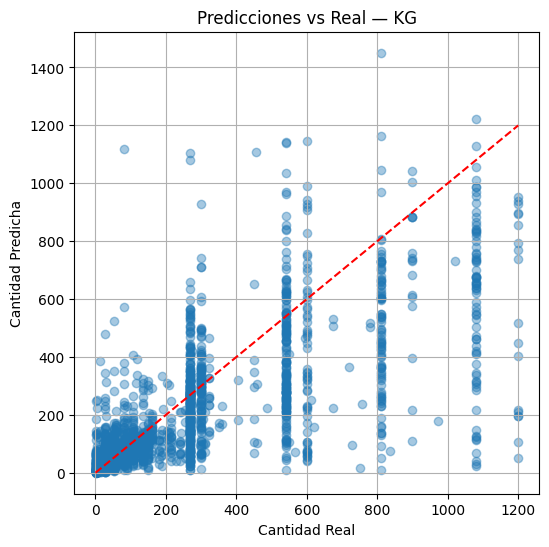


 Métricas para L:
  MAE  = 89.24
  RMSE = 143.09
  R²   = 0.405


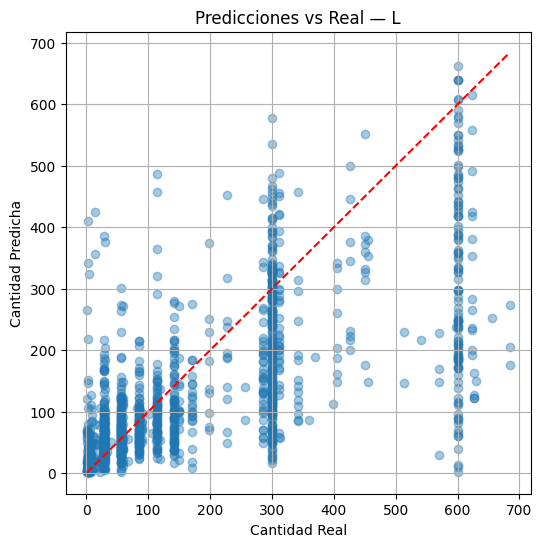


 Métricas para PZA:
  MAE  = 5.87
  RMSE = 9.83
  R²   = 0.506


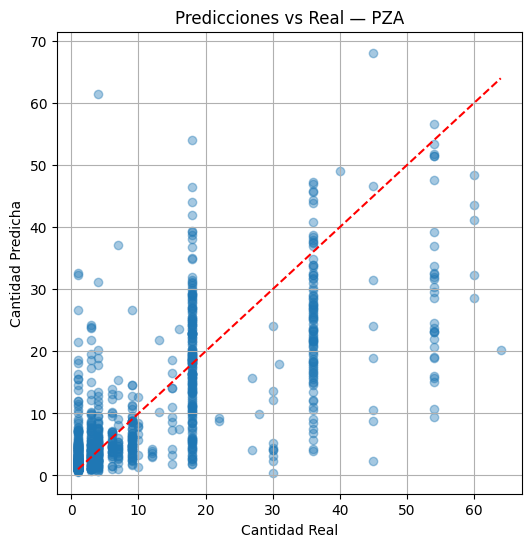

In [ ]:
evaluar_modelo(modelo_kg_iqr, X_test_kg, y_test_kg, "KG")
evaluar_modelo(modelo_l_iqr, X_test_l, y_test_l, "L")
evaluar_modelo(modelo_pza_iqr, X_test_pza, y_test_pza, "PZA")

In [ ]:
def predecir_futuro_por_unidad(df_base, modelo, le_articulo, le_cliente, dias=30):
    """
    Genera predicciones futuras por unidad de venta.
    """
    import pandas as pd
    import numpy as np

    # Obtener artículos únicos y última fecha registrada
    articulos_unicos = df_base["Articulo"].unique()
    ultima_fecha = pd.to_datetime(df_base["Creacion Orden de Venta"]).max()
    fechas_futuras = pd.date_range(start=ultima_fecha + pd.Timedelta(days=1), periods=dias)

    # Crear todas las combinaciones (cartesiano) de fechas y artículos
    df_futuro = pd.MultiIndex.from_product([fechas_futuras, articulos_unicos], names=["Fecha", "Articulo"]).to_frame(index=False)

    # Extraer variables temporales
    df_futuro["Año"] = df_futuro["Fecha"].dt.year
    df_futuro["Mes"] = df_futuro["Fecha"].dt.month
    df_futuro["Dia"] = df_futuro["Fecha"].dt.day
    df_futuro["DiaSemana"] = df_futuro["Fecha"].dt.dayofweek

    # Codificar artículos
    # Filtrar artículos conocidos
    articulos_validos = le_articulo.classes_
    df_futuro = df_futuro[df_futuro["Articulo"].isin(articulos_validos)]

    # Codificar artículos (ahora seguros)
    df_futuro["Articulo_cod"] = le_articulo.transform(df_futuro["Articulo"])


    # Usar el cliente más frecuente como proxy (ya codificado)
    cliente_mas_frecuente = df_base["Codigo Cliente"].mode()[0]
    cliente_codificado = le_cliente.transform([cliente_mas_frecuente])[0]
    df_futuro["Cliente_cod"] = cliente_codificado

    # Variables para predicción
    X_futuro = df_futuro[["Año", "Mes", "Dia", "DiaSemana", "Articulo_cod", "Cliente_cod"]]

    # Predecir en log y revertir
    df_futuro["Prediccion_Cantidad"] = np.expm1(modelo.predict(X_futuro))


    return df_futuro[["Fecha", "Articulo", "Prediccion_Cantidad"]]


In [ ]:

pred_kg = predecir_futuro_por_unidad(df_kg, modelo_kg_iqr, le_art_kg_iqr, le_cli_kg_iqr, dias=30)
pred_l = predecir_futuro_por_unidad(df_l, modelo_l_iqr, le_art_l_iqr, le_cli_l_iqr, dias=30)
pred_pza = predecir_futuro_por_unidad(df_pza, modelo_pza_iqr, le_art_pza_iqr, le_cli_pza_iqr, dias=30)


In [ ]:
import matplotlib.pyplot as plt

def graficar_predicciones_futuras(df_predicciones, nombre_unidad, top_n=5):


   # Articulos ms ordenados
    top_articulos = df_predicciones["Articulo"].value_counts().head(top_n).index.tolist()


    plt.figure(figsize=(12, 5))
    for art in top_articulos:
        df_art = df_predicciones[df_predicciones["Articulo"] == art]
        plt.plot(df_art["Fecha"], df_art["Prediccion_Cantidad"], label=art)

    plt.title(f"Predicciones Futuras — {nombre_unidad} (Top {len(top_articulos)} Artículos)")
    plt.xlabel("Fecha")
    plt.ylabel("Cantidad Predicha")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


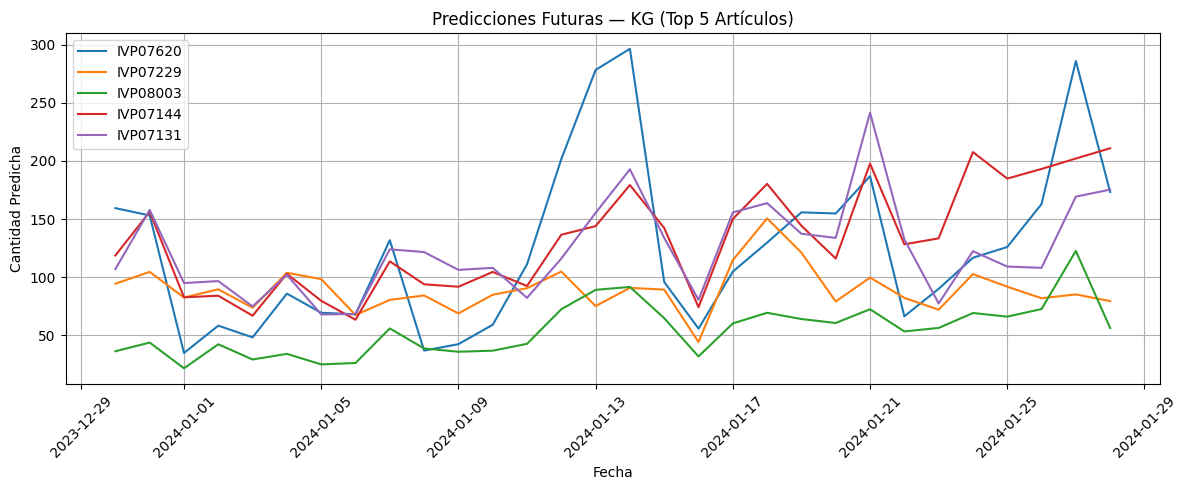

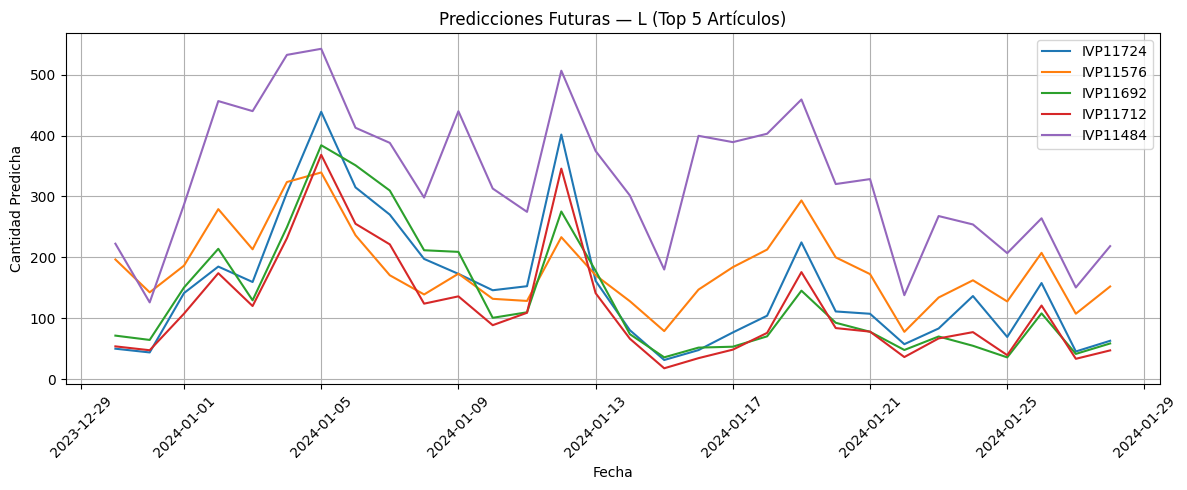

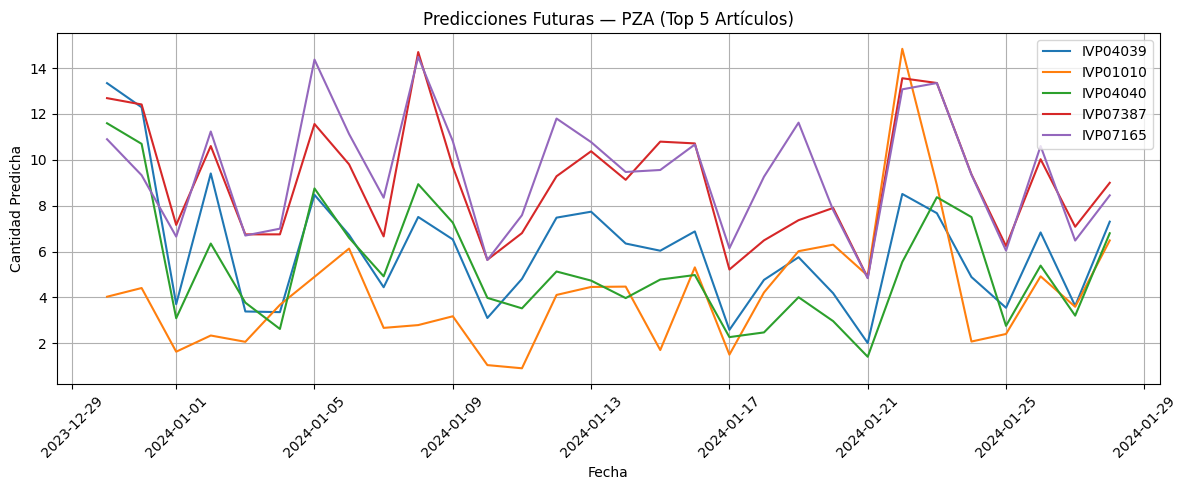

In [ ]:
graficar_predicciones_futuras(pred_kg, "KG", top_n=5)
graficar_predicciones_futuras(pred_l, "L", top_n=5)
graficar_predicciones_futuras(pred_pza, "PZA", top_n=5)



 Métricas para KG (train):
  MAE  = 64.28
  RMSE = 129.86
  R²   = 0.797


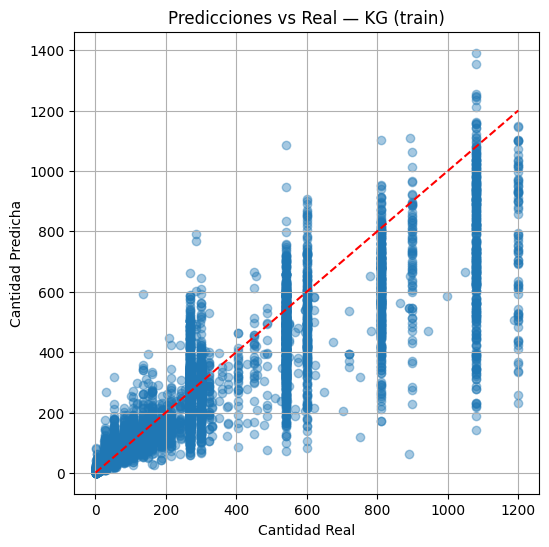


 Métricas para KG (test):
  MAE  = 106.85
  RMSE = 194.34
  R²   = 0.528


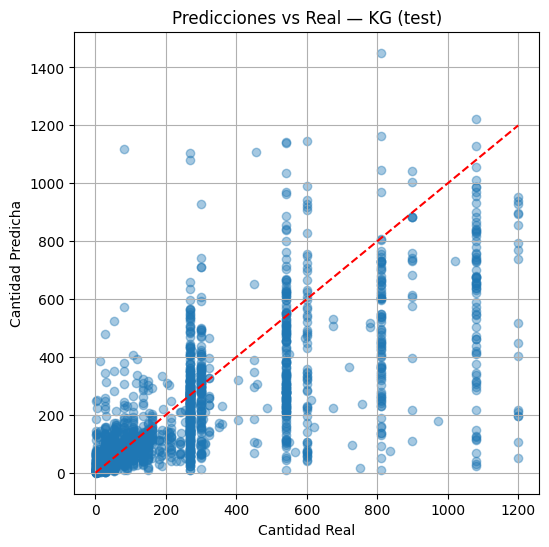

In [ ]:
evaluar_modelo(modelo_kg_iqr, X_train_kg, y_train_kg, "KG (train)")
evaluar_modelo(modelo_kg_iqr, X_test_kg, y_test_kg, "KG (test)")
#Hay sobreajuste


 Métricas para L (train):
  MAE  = 38.76
  RMSE = 72.56
  R²   = 0.850


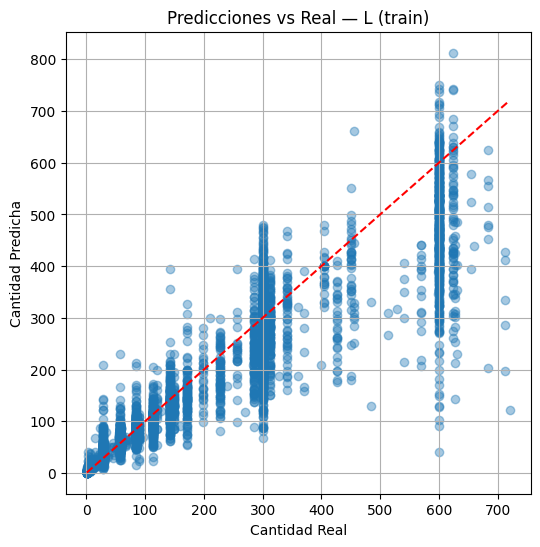


 Métricas para L (test):
  MAE  = 89.24
  RMSE = 143.09
  R²   = 0.405


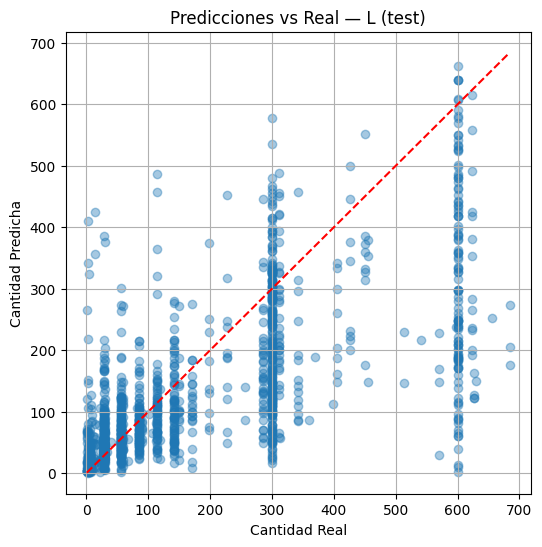

In [ ]:
evaluar_modelo(modelo_l_iqr, X_train_l, y_train_l, "L (train)")
evaluar_modelo(modelo_l_iqr, X_test_l, y_test_l, "L (test)")
#Hay sobreajuste


 Métricas para PZA (train):
  MAE  = 2.18
  RMSE = 4.25
  R²   = 0.911


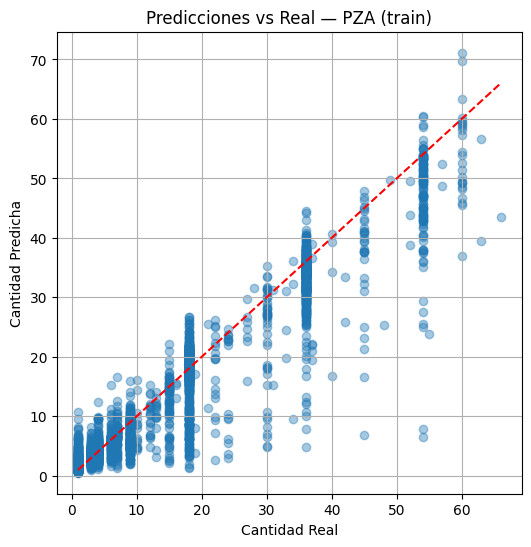


 Métricas para PZA (test):
  MAE  = 5.87
  RMSE = 9.83
  R²   = 0.506


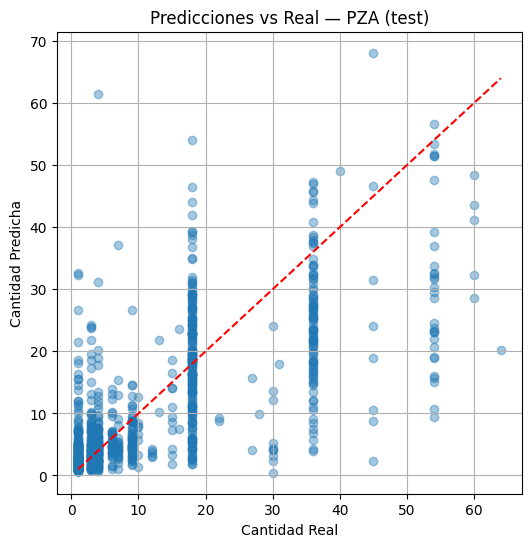

In [ ]:
evaluar_modelo(modelo_pza_iqr, X_train_pza, y_train_pza, "PZA (train)")
evaluar_modelo(modelo_pza_iqr, X_test_pza, y_test_pza, "PZA (test)")
#Hay sobreajuste

In [ ]:
pred_kg["Unidad"] = "KG"
pred_l["Unidad"] = "L"
pred_pza["Unidad"] = "PZA"


In [ ]:
#Prediccion mensual
top_articulos = pred_kg["Articulo"].value_counts().head(5).index.tolist()

pred_kg[pred_kg["Articulo"].isin(top_articulos)] \
    .groupby(["Unidad", "Articulo"])["Prediccion_Cantidad"] \
    .sum().sort_values(ascending=False)




Unidad  Articulo
KG      IVP07144    3976.400879
        IVP07620    3740.476807
        IVP07131    3717.433350
        IVP07229    2689.377930
        IVP08003    1642.793213
Name: Prediccion_Cantidad, dtype: float32

In [ ]:

top_articulos = pred_l["Articulo"].value_counts().head(5).index.tolist()

pred_l[pred_l["Articulo"].isin(top_articulos)] \
    .groupby(["Unidad", "Articulo"])["Prediccion_Cantidad"] \
    .sum().sort_values(ascending=False)


Unidad  Articulo
L       IVP11484    9894.107422
        IVP11576    5447.741211
        IVP11724    4536.099609
        IVP11692    4024.128662
        IVP11712    3523.736328
Name: Prediccion_Cantidad, dtype: float32

In [ ]:

top_articulos = pred_pza["Articulo"].value_counts().head(5).index.tolist()


pred_pza[pred_pza["Articulo"].isin(top_articulos)] \
    .groupby(["Unidad", "Articulo"])["Prediccion_Cantidad"] \
    .sum().sort_values(ascending=False)


Unidad  Articulo
PZA     IVP07165    283.482544
        IVP07387    272.006775
        IVP04039    183.255035
        IVP04040    158.400436
        IVP01010    126.040398
Name: Prediccion_Cantidad, dtype: float32